In [ ]:
!pip install beautifulsoup4
!pip install lxml

In [ ]:
from bs4 import BeautifulSoup
import pandas as pd
import lxml, requests, re
print('libraries imported')

#making list file
titles=[]
years=[]
ratings=[]
metascores=[]
stories=[]
categories=[]
runtimes=[]
directors=[]
stars=[]
gross=[]

def Soupimdb(soup):   
    for n in range (1,101):
        # find the title
        title=soup.select(f'#main > div > div.lister.list.detail.sub-list > div > div:nth-child({n}) > div.lister-item-content > h3 > a')[0].text.strip()
        titles.append(title)

        # find the year
        year=soup.select(f'#main > div > div.lister.list.detail.sub-list > div > div:nth-child({n}) > div.lister-item-content > h3 > span.lister-item-year.text-muted.unbold')[0].text.strip()
        decimal = re.compile(r'[^\d.]+')
        year=decimal.sub('', year)
        years.append(year)

        #find the rating
        rating=soup.select(f'#main > div > div.lister.list.detail.sub-list > div > div:nth-child({n}) > div.lister-item-content > div > div.inline-block.ratings-imdb-rating > strong')[0].text.strip()
        ratings.append(rating)

        #find the metascore
        try:
            metascore=soup.select(f'#main > div > div.lister.list.detail.sub-list > div > div:nth-child({n}) > div.lister-item-content > div > div.inline-block.ratings-metascore')[0].text.strip()
            metascore=metascore.split('\n')[0].strip()
            metascores.append(metascore)
        except:
            metascores.append('NaN')

        #find the story
        story=soup.select(f'#main > div > div.lister.list.detail.sub-list > div > div:nth-child({n}) > div.lister-item-content > p:nth-child(4)')[0].text.strip()
        stories.append(story)

        #film category and runtimes
        details=soup.select(f'#main > div > div.lister.list.detail.sub-list > div > div:nth-child({n}) > div.lister-item-content > p:nth-child(2)')[0].text.strip().split('|')
        details=[i.strip() for i in details]
        categories.append(details[-1])
        runtimes.append(details[-2])

        #staff works on the film
        staff=soup.select(f'#main > div > div.lister.list.detail.sub-list > div > div:nth-child({n}) > div.lister-item-content > p:nth-child(5)')[0].text.strip().split('|')
        try:
            director=staff[0].split(':')[1].strip().split(',')
            director=[i.strip() for i in director]
            directors.append(director)
        except:
            directors.append(director)
        star=staff[1].split(':')[1].strip().split(',')
        star=[i.strip() for i in star]
        stars.append(star)

        #Gross
        try:
            money=soup.select(f'#main > div > div.lister.list.detail.sub-list > div > div:nth-child({n}) > div.lister-item-content > p.sort-num_votes-visible > span:nth-child(5)')[0].text.strip()
            gross.append(money)
        except:
            gross.append('NaN')
print('Soupimdb is now ready') 

In [ ]:
for page in [0,101,201,301,401,501,601,701,801,901]:
    url=f'https://www.imdb.com/search/title/?groups=top_1000&sort=user_rating,desc&count=100&start={page}&ref_=adv_nxt'
    res=requests.get(url)
    res.raise_for_status
    soup = BeautifulSoup(res.text, 'lxml')
    Soupimdb(soup)

In [ ]:
pd.set_option('display.max_colwidth', 0)
df=pd.DataFrame({'title':titles,'year':years,'rating':ratings,'metascore':metascores,\
                 'category':categories,'director':directors,'stars':stars,'length':runtimes,'gross':gross})



In [ ]:
print(df.shape[0])
df.tail(50)

In [193]:
df.to_csv('IMDB top1000 movies.csv')

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [187]:
df=pd.read_csv('IMDB top1000 movies.csv',index_col=0)

In [188]:
df.head()

,title,year,rating,metascore,category,director,stars,length,gross
0,The Shawshank Redemption,1994,9.3,80.0,Drama,Frank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton, William Sadler",142 min,$28.34M
1,The Godfather,1972,9.2,100.0,"Crime, Drama",Francis Ford Coppola,"Marlon Brando, Al Pacino, James Caan, Diane Keaton",175 min,$134.97M
2,The Dark Knight,2008,9.0,84.0,"Action, Crime, Drama",Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, Michael Caine",152 min,$534.86M
3,The Godfather: Part II,1974,9.0,90.0,"Crime, Drama",Francis Ford Coppola,"Al Pacino, Robert De Niro, Robert Duvall, Diane Keaton",202 min,$57.30M
4,The Lord of the Rings: The Return of the King,2003,8.9,94.0,"Adventure, Drama, Fantasy",Peter Jackson,"Elijah Wood, Viggo Mortensen, Ian McKellen, Orlando Bloom",201 min,$377.85M


In [192]:
df['decade']=df.year.astype(int)//10*10
df.head()

,title,year,rating,metascore,category,director,stars,length,gross,story,decade
0,The Shawshank Redemption,1994,9.3,80.0,Drama,Frank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton, William Sadler",142 min,$28.34M,"Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.",1990
1,The Godfather,1972,9.2,100.0,"Crime, Drama",Francis Ford Coppola,"Marlon Brando, Al Pacino, James Caan, Diane Keaton",175 min,$134.97M,The aging patriarch of an organized crime dynasty transfers control of his clandestine empire to his reluctant son.,1970
2,The Dark Knight,2008,9.0,84.0,"Action, Crime, Drama",Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, Michael Caine",152 min,$534.86M,"When the menace known as the Joker wreaks havoc and chaos on the people of Gotham, Batman must accept one of the greatest psychological and physical tests of his ability to fight injustice.",2000
3,The Godfather: Part II,1974,9.0,90.0,"Crime, Drama",Francis Ford Coppola,"Al Pacino, Robert De Niro, Robert Duvall, Diane Keaton",202 min,$57.30M,"The early life and career of Vito Corleone in 1920s New York City is portrayed, while his son, Michael, expands and tightens his grip on the family crime syndicate.",1970
4,The Lord of the Rings: The Return of the King,2003,8.9,94.0,"Adventure, Drama, Fantasy",Peter Jackson,"Elijah Wood, Viggo Mortensen, Ian McKellen, Orlando Bloom",201 min,$377.85M,Gandalf and Aragorn lead the World of Men against Sauron's army to draw his gaze from Frodo and Sam as they approach Mount Doom with the One Ring.,2000


In [183]:
df.groupby(df.decade).size()

decade
1920    10 
1930    24 
1940    36 
1950    55 
1960    75 
1970    75 
1980    92 
1990    150
2000    249
2010    234
dtype: int64

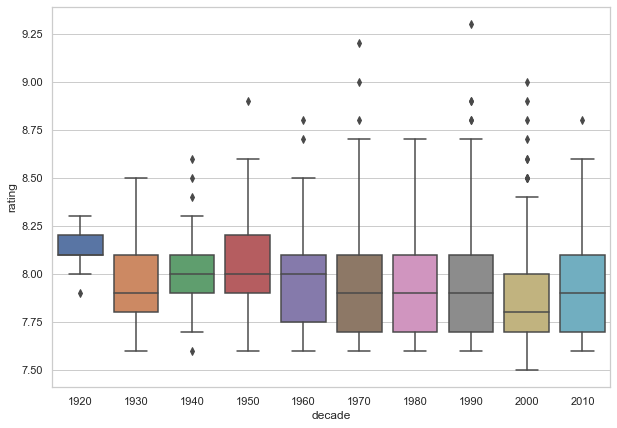

In [185]:
plt.figure(figsize=(10, 7))
sns.set(style="whitegrid")
ax = sns.boxplot(x=df.decade,y=df.rating,data=df)

In [189]:
df['story']=stories

In [191]:
df.head()

,title,year,rating,metascore,category,director,stars,length,gross,story
0,The Shawshank Redemption,1994,9.3,80.0,Drama,Frank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton, William Sadler",142 min,$28.34M,"Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency."
1,The Godfather,1972,9.2,100.0,"Crime, Drama",Francis Ford Coppola,"Marlon Brando, Al Pacino, James Caan, Diane Keaton",175 min,$134.97M,The aging patriarch of an organized crime dynasty transfers control of his clandestine empire to his reluctant son.
2,The Dark Knight,2008,9.0,84.0,"Action, Crime, Drama",Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, Michael Caine",152 min,$534.86M,"When the menace known as the Joker wreaks havoc and chaos on the people of Gotham, Batman must accept one of the greatest psychological and physical tests of his ability to fight injustice."
3,The Godfather: Part II,1974,9.0,90.0,"Crime, Drama",Francis Ford Coppola,"Al Pacino, Robert De Niro, Robert Duvall, Diane Keaton",202 min,$57.30M,"The early life and career of Vito Corleone in 1920s New York City is portrayed, while his son, Michael, expands and tightens his grip on the family crime syndicate."
4,The Lord of the Rings: The Return of the King,2003,8.9,94.0,"Adventure, Drama, Fantasy",Peter Jackson,"Elijah Wood, Viggo Mortensen, Ian McKellen, Orlando Bloom",201 min,$377.85M,Gandalf and Aragorn lead the World of Men against Sauron's army to draw his gaze from Frodo and Sam as they approach Mount Doom with the One Ring.
